In [261]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

# Khởi tạo trình duyệt Chrome
driver = webdriver.Chrome()

# Mở trang web Tradingview
driver.get("https://www.tradingview.com/markets/stocks-usa/market-movers-all-stocks/")

# Số lần nhấn nút "Load More" tối đa (hoặc bạn có thể sử dụng điều kiện khác)
max_loads = 5

loads = 0
data_rows = []

while loads < max_loads:
    try:
        load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".loadButton-SFwfC2e0")))
        load_more_button.click()
        loads += 1
    except:
        break

# Chờ cho dữ liệu được tải đầy đủ
WebDriverWait(driver, 10).until(EC.invisibility_of_element_located((By.CSS_SELECTOR, ".loadingContent-2CAlGV8F")))

# Tạo biến soup1 từ trang web đã tải
soup1 = BeautifulSoup(driver.page_source, 'html.parser')

# Trích xuất dữ liệu và thêm vào danh sách dòng dữ liệu
row_data = soup1.find_all('tr', class_='row-RdUXZpkv')
for row in row_data:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    if len(individual_row) == 11:  # Kiểm tra xem có đủ dữ liệu không
        data_rows.append(individual_row)

# Tạo DataFrame từ danh sách dòng dữ liệu
data_for_all = pd.DataFrame(data_rows, columns=["Stock", "Price", "Change", "Volume", "Market Cap", "PE Ratio", "EPS", "Dividend", "Yield", "Sector", "Recommendation"])

# Đóng trình duyệt sau khi hoàn thành
driver.quit()

In [262]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",115.91 USD,0.90%,6.89M,33.914B USD,30.40,3.81 USD,−13.21%,0.76%,Health Technology,Buy
1,AAAlcoa CorporationD,28.85 USD,−4.44%,8.716M,5.148B USD,—,−8.15 USD,−259.86%,1.39%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.71 USD,−0.09%,19.471K,756.172M USD,—,−0.09 USD,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.75 USD,0.00%,211,99.097M USD,—,−0.03 USD,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.25 USD,0.10%,14.04K,512.5M USD,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
495,AYAtlantica Sustainable Infrastructure plcD,22.88 USD,−0.78%,461.448K,2.655B USD,187.54,0.12 USD,—,7.78%,Utilities,Buy
496,"AYIAcuity Brands, Inc.D",159.59 USD,−0.48%,708.466K,4.978B USD,13.73,11.62 USD,11.81%,0.33%,Producer Manufacturing,Buy
497,"AYROAYRO, Inc.D",3.8832 USD,−0.53%,84.012K,18.315M USD,—,−0.64 USD,22.59%,0.00%,Producer Manufacturing,Strong Buy
498,"AYTUAytu BioPharma, Inc.D",1.62 USD,5.88%,33.445K,6.124M USD,—,−60.38 USD,26.73%,0.00%,Health Technology,Strong Buy


In [263]:
# Danh sách các cột chứa ký tự 'USD'
usd_columns = ["Price", "Market Cap", "EPS"]

# Chuyển đổi cột sang kiểu chuỗi và sau đó loại bỏ chữ 'USD'
for column in usd_columns:
    data_for_all[column] = data_for_all[column].astype(str).str.replace(' USD', '')

# In ra DataFrame sau khi đã loại bỏ 'USD'
print(data_for_all)

                                           Stock   Price  Change    Volume  \
0                   AAgilent Technologies, Inc.D  115.91   0.90%     6.89M   
1                           AAAlcoa CorporationD   28.85  −4.44%    8.716M   
2               AACAres Acquisition CorporationD   10.71  −0.09%   19.471K   
3                AACIArmada Acquisition Corp. ID   10.75   0.00%       211   
4           AACTAres Acquisition Corporation IID   10.25   0.10%    14.04K   
..                                           ...     ...     ...       ...   
495  AYAtlantica Sustainable Infrastructure plcD   22.88  −0.78%  461.448K   
496                      AYIAcuity Brands, Inc.D  159.59  −0.48%  708.466K   
497                              AYROAYRO, Inc.D  3.8832  −0.53%   84.012K   
498                    AYTUAytu BioPharma, Inc.D    1.62   5.88%   33.445K   
499                            AYXAlteryx, Inc.D   34.85  −2.13%    2.289M   

    Market Cap PE Ratio     EPS  Dividend  Yield               

In [264]:
data_for_all.fillna(0, inplace=True)
data_for_all.isnull().sum()

Stock             0
Price             0
Change            0
Volume            0
Market Cap        0
PE Ratio          0
EPS               0
Dividend          0
Yield             0
Sector            0
Recommendation    0
dtype: int64

In [265]:
# Hàm để quy đổi đơn vị
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

# Áp dụng hàm cho cột "Volume"
data_for_all['Volume'] = data_for_all['Volume'].apply(convert_volume)

In [266]:
def convert_market_cap(value):
    if 'T' in value:
        return float(value.replace('T', '')) * 1e12  # Chuyển đổi tỷ thành 10^12
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9   # Chuyển đổi tỉ thành 10^9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6   # Chuyển đổi triệu thành 10^6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3   # Chuyển đổi ngàn thành 10^3
    else:
        return float(value)

# Áp dụng hàm cho cột "Market Cap"
data_for_all['Market Cap'] = data_for_all['Market Cap'].apply(convert_market_cap)

In [267]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",115.91,0.90%,6890000.0,3.391400e+10,30.40,3.81,−13.21%,0.76%,Health Technology,Buy
1,AAAlcoa CorporationD,28.85,−4.44%,8716000.0,5.148000e+09,—,−8.15,−259.86%,1.39%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.71,−0.09%,19471.0,7.561720e+08,—,−0.09,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.75,0.00%,211.0,9.909700e+07,—,−0.03,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.25,0.10%,14040.0,5.125000e+08,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
495,AYAtlantica Sustainable Infrastructure plcD,22.88,−0.78%,461448.0,2.655000e+09,187.54,0.12,—,7.78%,Utilities,Buy
496,"AYIAcuity Brands, Inc.D",159.59,−0.48%,708466.0,4.978000e+09,13.73,11.62,11.81%,0.33%,Producer Manufacturing,Buy
497,"AYROAYRO, Inc.D",3.8832,−0.53%,84012.0,1.831500e+07,—,−0.64,22.59%,0.00%,Producer Manufacturing,Strong Buy
498,"AYTUAytu BioPharma, Inc.D",1.62,5.88%,33445.0,6.124000e+06,—,−60.38,26.73%,0.00%,Health Technology,Strong Buy


In [268]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl

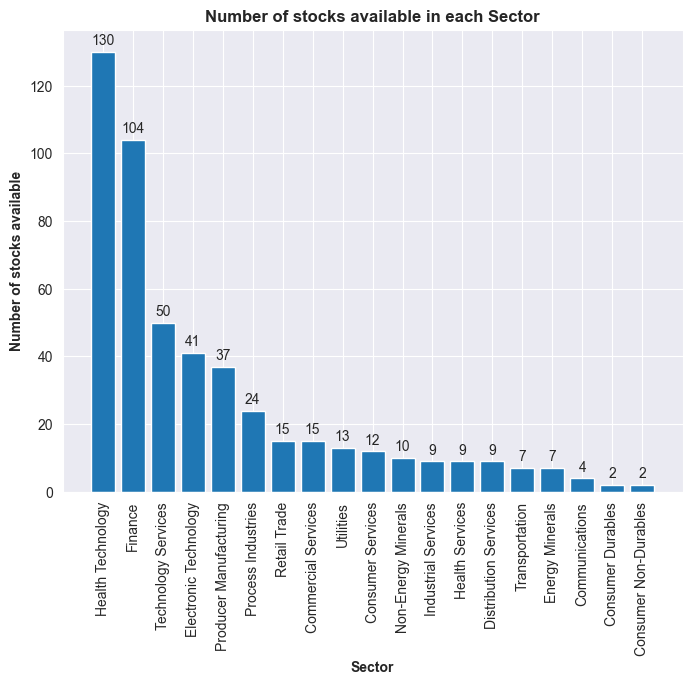

In [269]:
# Count number of unique sectors
sector_counts = data_for_all['Sector'].value_counts()
sector_counts = sector_counts.rename_axis('Sector').reset_index(name='Number of stocks available')
# print(sector_counts)

# Draw a bar chart showing number of stocks available in each sector
fig, ax = plt.subplots(figsize=(8, 6))
bars = plt.bar(sector_counts['Sector'], sector_counts['Number of stocks available'])
plt.xlabel('Sector', fontweight='bold')
plt.ylabel('Number of stocks available', fontweight='bold')
plt.title('Number of stocks available in each Sector', fontweight='extra bold')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

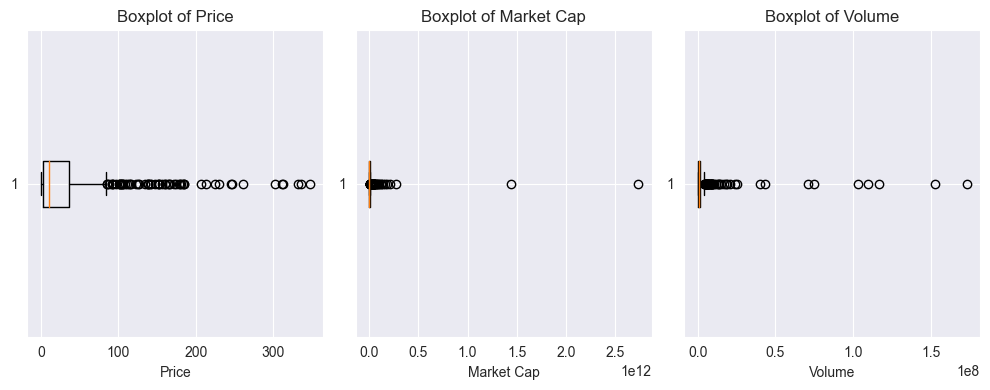

In [282]:
data_for_all['Price'] = pd.to_numeric(data_for_all['Price'], errors='coerce')
data_for_all['Market Cap'] = pd.to_numeric(data_for_all['Market Cap'], errors='coerce')
data_for_all['Volume'] = pd.to_numeric(data_for_all['Volume'], errors='coerce')

# Create a figure with subplots
plt.figure(figsize=(10, 4))

# Boxplot for 'Price'
plt.subplot(1, 3, 1)
plt.boxplot(data_for_all['Price'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True)

# Boxplot for 'Market Cap'
plt.subplot(1, 3, 2)
plt.boxplot(data_for_all['Market Cap'], vert=False)
plt.title('Boxplot of Market Cap')
plt.xlabel('Market Cap')
plt.grid(True)

# Boxplot for 'Volume'
plt.subplot(1, 3, 3)
plt.boxplot(data_for_all['Volume'], vert=False)
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [271]:
data_for_all["Price"].skew()

4.970188058792371

In [272]:
data_for_all["Price"].quantile(0.995)
data_for_all = data_for_all[data_for_all["Price"]<data_for_all["Price"].quantile(0.995)].reset_index(drop=True)

In [273]:
data_for_all["Price"].skew()

2.8484827698671897

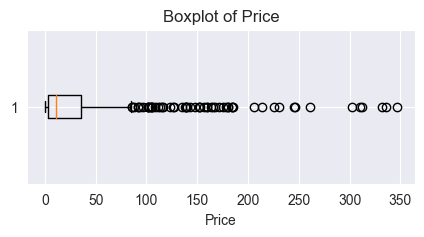

In [274]:
plt.figure(figsize=(5, 2))
plt.boxplot(data_for_all['Price'], vert=False)  # vert=False to create a horizontal boxplot
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [275]:
data_for_all.describe()

,Price,Volume,Market Cap
count,497.000000,4.970000e+02,4.970000e+02
mean,34.235649,3.361547e+06,1.488308e+10
std,56.655112,1.445802e+07,1.401820e+11
min,0.130000,1.170000e+02,2.251000e+06
25%,3.280000,7.662900e+04,7.652400e+07
50%,10.710000,5.893900e+05,4.521360e+08
75%,35.860000,1.792000e+06,2.823000e+09
max,347.120000,1.728380e+08,2.736000e+12


In [276]:
# Select data
selected_columns = ['Price', 'Volume', 'Market Cap']
selected_data = data_for_all[selected_columns]

# Calculate means, variances, covariances, and correlations
means = selected_data.mean()
variances = selected_data.var()
cov_matrix = selected_data.cov()
corr_matrix = selected_data.corr()

# Create a summary table
summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Covariance with Price', 'Covariance with Volume', 'Covariance with Market Cap', 'Correlation with Price', 'Correlation with Volume', 'Correlation with Market Cap'],
    'Price': [means['Price'], variances['Price'], cov_matrix.loc['Price', 'Price'], cov_matrix.loc['Volume', 'Price'], cov_matrix.loc['Market Cap', 'Price'], corr_matrix.loc['Price', 'Price'], corr_matrix.loc['Volume', 'Price'], corr_matrix.loc['Market Cap', 'Price']],
    'Volume': [means['Volume'], variances['Volume'], cov_matrix.loc['Price', 'Volume'], cov_matrix.loc['Volume', 'Volume'], cov_matrix.loc['Market Cap', 'Volume'], corr_matrix.loc['Price', 'Volume'], corr_matrix.loc['Volume', 'Volume'], corr_matrix.loc['Market Cap', 'Volume']],
    'Market Cap': [means['Market Cap'], variances['Market Cap'], cov_matrix.loc['Price', 'Market Cap'], cov_matrix.loc['Volume', 'Market Cap'], cov_matrix.loc['Market Cap', 'Market Cap'], corr_matrix.loc['Price', 'Market Cap'], corr_matrix.loc['Volume', 'Market Cap'], corr_matrix.loc['Market Cap', 'Market Cap']]
})

# Set the Statistic column as the index
summary_table.set_index('Statistic', inplace=True)

# Display the summary table
print(summary_table)

                                    Price        Volume    Market Cap
Statistic                                                            
Mean                         3.423565e+01  3.361547e+06  1.488308e+10
Variance                     3.209802e+03  2.090344e+14  1.965100e+22
Covariance with Price        3.209802e+03  6.185826e+07  1.827839e+12
Covariance with Volume       6.185826e+07  2.090344e+14  9.202861e+17
Covariance with Market Cap   1.827839e+12  9.202861e+17  1.965100e+22
Correlation with Price       1.000000e+00  7.551787e-02  2.301476e-01
Correlation with Volume      7.551787e-02  1.000000e+00  4.540689e-01
Correlation with Market Cap  2.301476e-01  4.540689e-01  1.000000e+00


add cmt here!!!

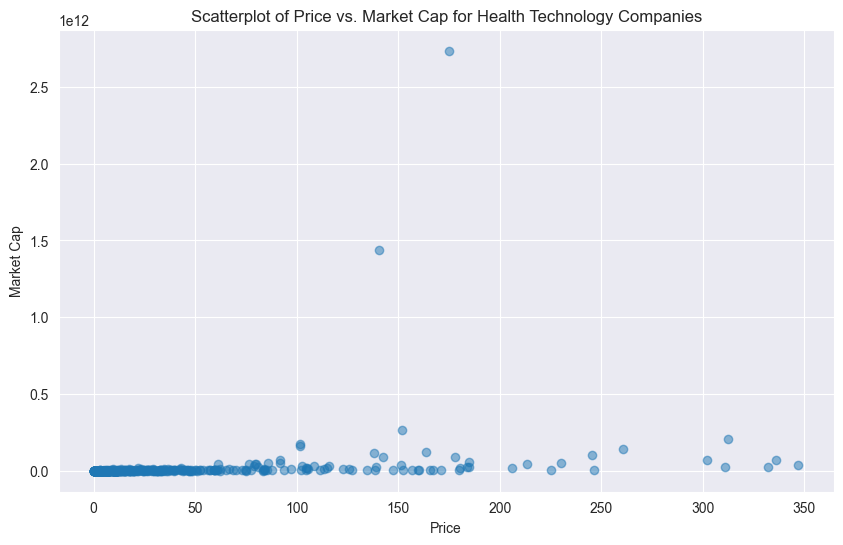

In [277]:
plt.figure(figsize=(10, 6))
plt.scatter(data_for_all['Price'], data_for_all['Market Cap'], alpha=0.5)
plt.title('Scatterplot of Price vs. Market Cap for Health Technology Companies')
plt.xlabel('Price')
plt.ylabel('Market Cap')
plt.grid(True)

# Show the plot
plt.show()

In [278]:
# Calculate the 99.5th percentile for 'Price' within health_tech_data
price_995_quantile = health_tech_data["Price"].quantile(0.995)

# Filter health_tech_data to exclude values above the 99.5th percentile
health_tech_data = health_tech_data[health_tech_data["Price"] < price_995_quantile].reset_index(drop=True)

# Calculate the skewness of 'Price' within health_tech_data
price_skewness = health_tech_data["Price"].skew()

# Print or use the price_skewness value as needed
print("Skewness of 'Price' in health_tech_data:", price_skewness)

Skewness of 'Price' in health_tech_data: 2.687531322338075


In [ ]:
import matplotlib.pyplot as plt
# Lấy dữ liệu từ cột "Price"
prices = data_for_all["Price"]

# Vẽ biểu đồ cho cột "Price"
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.plot(prices, marker='o', linestyle='-', color='b')  # Vẽ biểu đồ đường
plt.title('Biểu đồ giá cổ phiếu')  # Tiêu đề biểu đồ
plt.xlabel('Số lần load dữ liệu')  # Nhãn x cho trục hoành
plt.ylabel('Giá')  # Nhãn y cho trục tung
plt.grid(True)  # Hiển thị lưới

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Lấy dữ liệu từ 5 cột tiếp theo
columns_to_plot = ["Change", "Volume", "Market Cap", "PE Ratio", "EPS"]

# Vẽ biểu đồ cho từng cột
plt.figure(figsize=(12, 8))  # Kích thước biểu đồ

for column in columns_to_plot:
    plt.plot(data_for_all[column], marker='o', linestyle='-', label=column)

plt.title('Biểu đồ các cột')  # Tiêu đề biểu đồ
plt.xlabel('Số lần load dữ liệu')  # Nhãn x cho trục hoành
plt.grid(True)  # Hiển thị lưới
plt.legend()  # Hiển thị chú thích

# Hiển thị biểu đồ
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu mẫu (ảo tưởng)
volume_data = [500000, 750000, 300000, 400000]
pe_ratio_data = [15, 20, 25, 30]
stock_names = ["Stock A", "Stock B", "Stock C", "Stock D"]

# Tạo biểu đồ pie cho dữ liệu "Volume"
plt.figure(figsize=(8, 8))
plt.pie(volume_data, labels=stock_names, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Volume của các cổ phiếu')
plt.axis('equal')  # Để biểu đồ tròn

plt.show()

# Tạo biểu đồ pie cho dữ liệu "PE Ratio"
plt.figure(figsize=(8, 8))
plt.pie(pe_ratio_data, labels=stock_names, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối PE Ratio của các cổ phiếu')
plt.axis('equal')  # Để biểu đồ tròn

plt.show()